In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')

In [2]:
# Function to calculate metrics
def calculate_metrics(df, method, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df.loc[method] = [mae, mse, rmse]

In [3]:
# Function to calculate cross validation
def calculate_cross_validation_scores (df, model, method, X, y):
    my_cv = 10
    mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=my_cv).mean()
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=my_cv).mean()
    rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=my_cv).mean()
    df.loc[method] = [mae, mse, rmse]

In [4]:

# Load the CSV file into a pandas dataframe
df = pd.read_csv("C:\\Users\\Acer\\CNC Machine.csv")
pd.set_option('display.max_columns', None)
df
#print(df.head())

,Untitled,Filename,start_time,end_time,edge,meterID,processing_time,average_power_consumption,number_of_missing_datapoints,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,0,2595627-1SP-Delfine.h,1649055030,1649055950,1237,2,920,2358.227174,0.0,13665960.0,5809,5,11,6,7943.871850,15.894075,43.432648,4.010019,397.763344,0.119715,3678.871193
1,1,2595627-2SP-Delfine.h,1649056780,1649057100,1237,2,320,2538.087500,0.0,13665960.0,462,4,13,7,7865.566916,11.488688,28.009050,4.208145,284.941176,0.056104,1829.434099
2,2,2584149-2SP-Delfine.h,1649237400,1649237800,1237,2,400,2618.128141,1.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
3,3,2584149-2SP-Delfine.h,1649243450,1649243800,1237,2,350,3386.402857,0.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
4,4,2584149-2SP-Delfine.h,1649243850,1649244200,1237,2,350,3306.637143,0.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,IC000141-2SP-Delfine.h,1657167310,1657167500,1237,2,190,2410.263158,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
216,216,IC000141-2SP-Delfine.h,1657167620,1657167800,1237,2,180,2666.305556,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
217,217,IC000141-2SP-Delfine.h,1657167950,1657168130,1237,2,180,2558.338889,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
218,218,IC000143-1SP-Delfine.h,1657168460,1657168850,1237,2,390,2684.589744,0.0,13665960.0,526,7,15,8,8016.445910,9.254704,19.909091,4.328063,229.905138,0.050791,1554.875394


In [5]:
#Dropping the columns as our group believes that they might not have signifcant relevant
dataset = df.drop(['Untitled','Filename','start_time', 'end_time','edge','meterID','number_of_missing_datapoints'],axis=1)

# Checking descriptives without 'Model'
dataset.describe(include='all')


,processing_time,average_power_consumption,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
count,220.000000,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1022.886364,2835.372458,8.069418e+06,6895.327273,5.763636,48.781818,24.890909,7266.174121,11.980351,24.331000,3.957454,250.885067,0.090757,2286.169645
std,1457.893633,720.797069,6.621539e+06,9597.106987,4.731952,72.534971,36.267486,2189.851476,4.103559,11.825378,0.990693,106.988638,0.056323,1100.339999
min,100.000000,1552.895455,2.492280e+04,86.000000,1.000000,3.000000,2.000000,1992.065474,3.643155,5.289720,2.000000,40.000000,0.021064,128.391909
25%,292.500000,2181.747535,8.751360e+04,313.000000,2.000000,7.000000,4.000000,6651.293788,9.133333,12.719512,4.016703,166.427711,0.058525,1308.767723
50%,480.000000,2865.267542,1.366596e+07,968.500000,4.000000,21.000000,11.000000,7779.717345,12.126168,24.225867,4.062263,260.666667,0.081556,2285.863574
75%,912.500000,3451.490151,1.366596e+07,13447.000000,6.250000,63.000000,32.000000,8008.453531,15.506092,35.790476,4.462287,346.413408,0.100010,3115.166406
max,6920.000000,4355.949333,1.366596e+07,44441.000000,18.000000,263.000000,132.000000,11075.766550,19.136999,43.432648,5.646341,397.763344,0.470000,4428.093546


In [6]:
# Get X (independent variables) and y (dependent variable)
y_label = 'average_power_consumption'
X = dataset.loc[:, dataset.columns != y_label]
display(pd.DataFrame(X))
y = dataset.loc[:, y_label]
display(pd.DataFrame(y))

,processing_time,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,920,13665960.0,5809,5,11,6,7943.871850,15.894075,43.432648,4.010019,397.763344,0.119715,3678.871193
1,320,13665960.0,462,4,13,7,7865.566916,11.488688,28.009050,4.208145,284.941176,0.056104,1829.434099
2,400,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
3,350,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
4,350,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,190,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
216,180,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
217,180,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
218,390,13665960.0,526,7,15,8,8016.445910,9.254704,19.909091,4.328063,229.905138,0.050791,1554.875394


,average_power_consumption
0,2358.227174
1,2538.087500
2,2618.128141
3,3386.402857
4,3306.637143
...,...
215,2410.263158
216,2666.305556
217,2558.338889
218,2684.589744


In [7]:
my_test_size = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=42)
X_train.describe()

,processing_time,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
count,176.000000,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1005.312500,8.040613e+06,6307.829545,5.801136,47.375000,24.187500,7176.127820,12.226170,24.450262,4.057171,253.005783,0.087655,2246.980408
std,1472.296666,6.628658e+06,9273.040608,4.761776,72.554817,36.277408,2093.497889,3.936794,11.485945,0.954996,104.495442,0.050386,1064.156108
min,100.000000,2.492280e+04,86.000000,1.000000,3.000000,2.000000,1992.065474,3.643155,5.289720,2.000000,40.000000,0.021064,128.391909
25%,227.500000,8.751360e+04,313.000000,2.000000,7.000000,4.000000,6564.360381,10.295220,13.608449,4.029052,166.427711,0.058523,1228.905491
50%,477.500000,1.366596e+07,850.000000,4.000000,21.000000,11.000000,7779.717345,12.707317,24.225867,4.062263,260.666667,0.075496,2285.863574
75%,850.000000,1.366596e+07,13348.000000,9.000000,45.000000,23.000000,8008.453531,15.503060,31.681196,4.699454,346.413408,0.097018,3115.166406
max,6920.000000,1.366596e+07,27591.000000,18.000000,263.000000,132.000000,11075.766550,19.136999,43.432648,5.646341,397.763344,0.470000,4428.093546


In [8]:
# create error dataframe
error_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Decision Tree Regression', 'Random Forest Regression','Support Vector Regression','XGBoost','Neural Network'])
display(error_df)


,MAE,MSE,RMSE
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


In [9]:
# create cross valudation dataframe
cv_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Decision Tree Regression', 'Random Forest Regression','Support Vector Regression','XGBoost','Neural Network'])
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


# DECISION TREE

In [46]:
#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, min_samples_split=2, max_depth=5)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,2197.124380
1,2197.124380
2,3448.065260
3,1807.728039
4,3062.791667
5,3448.065260
6,2197.124380
7,3252.149275
8,3699.849666
9,2197.124380


In [47]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
print(results_df.head(100))


          Actual    Predicted
132  2150.987448  2197.124380
148  1953.708333  2197.124380
93   3259.469814  3448.065260
180  1780.595238  1807.728039
15   3069.429730  3062.791667
115  3596.176329  3448.065260
172  2216.133333  2197.124380
209  3069.082831  3252.149275
75   3610.986811  3699.849666
142  2103.446043  2197.124380
100  3195.445820  3448.065260
30   3763.072000  3699.849666
190  1885.376374  2197.124380
9    3218.144118  3124.249874
67   3527.551326  3699.849666
218  2684.589744  2666.743454
175  2541.206250  2197.124380
18   2164.733766  2500.456802
197  1875.694737  2197.124380
66   3552.323371  3699.849666
189  1679.554656  2197.124380
96   3081.985362  3448.065260
210  3328.408696  3252.149275
25   3713.024658  3699.849666
127  2038.204082  2207.377467
201  3320.846561  3699.849666
97   3212.981571  3448.065260
16   2979.997368  3062.791667
45   4056.210256  4229.679221
154  1739.708333  2197.124380
111  3641.928571  3448.065260
55   1990.092857  2197.124380
108  3434.

In [48]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))


          Actual    Predicted  Index
132  2150.987448  2197.124380      1
148  1953.708333  2197.124380      2
93   3259.469814  3448.065260      3
180  1780.595238  1807.728039      4
15   3069.429730  3062.791667      5
115  3596.176329  3448.065260      6
172  2216.133333  2197.124380      7
209  3069.082831  3252.149275      8
75   3610.986811  3699.849666      9
142  2103.446043  2197.124380     10
100  3195.445820  3448.065260     11
30   3763.072000  3699.849666     12
190  1885.376374  2197.124380     13
9    3218.144118  3124.249874     14
67   3527.551326  3699.849666     15
218  2684.589744  2666.743454     16
175  2541.206250  2197.124380     17
18   2164.733766  2500.456802     18
197  1875.694737  2197.124380     19
66   3552.323371  3699.849666     20
189  1679.554656  2197.124380     21
96   3081.985362  3448.065260     22
210  3328.408696  3252.149275     23
25   3713.024658  3699.849666     24
127  2038.204082  2207.377467     25
201  3320.846561  3699.849666     26
9

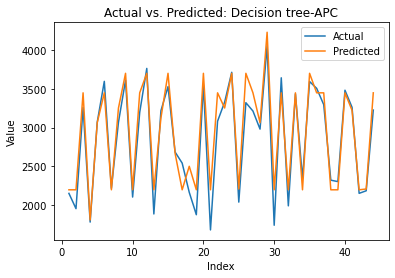

In [49]:
import matplotlib.pyplot as plt

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: Decision tree-APC')
plt.legend()

#Show plot
plt.show()

In [50]:
method = 'Decision Tree Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor,method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,160.095827,41648.209335,204.078929
Random Forest Regression,144.432414,36420.68487,190.842042
Support Vector Regression,425.466988,376568.439085,613.651725
XGBoost,141.546276,31913.271882,178.642861
Neural Network,532.838286,428095.222726,654.289861


,MAE,MSE,RMSE
Decision Tree Regression,-398.606497,-267079.315221,-474.934636
Random Forest Regression,-380.746304,-248378.655192,-448.999454
Support Vector Regression,-558.719225,-502703.142715,-651.877229
XGBoost,-403.867973,-277778.678589,-489.06207
Neural Network,-1772.633695,-6005354.161566,-1525.085906


Intercept 3285.5258741182806
Prediction_local [2663.92358913]
Right: 2197.1243797704165


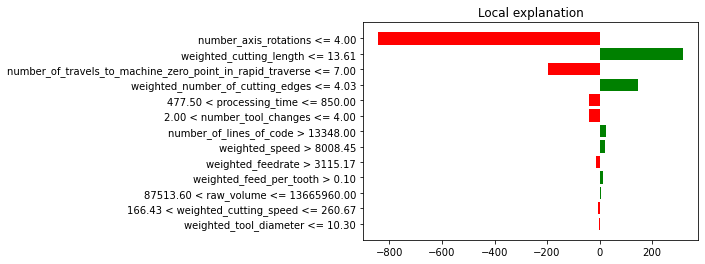

In [53]:
import lime
import lime.lime_tabular
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

# Define the predict function for Lime
#predict_fn_tree = lambda x: regressor.predict(x).reshape(-1, 1)

# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['average_power_consumption'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
heading_name = "My Lime Explanation"
doc.add_heading(heading_name, level=3)

# Update the heading text
for paragraph in doc.paragraphs:
    if paragraph.style.name == "Heading 3":
        paragraph.text = heading_name


# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


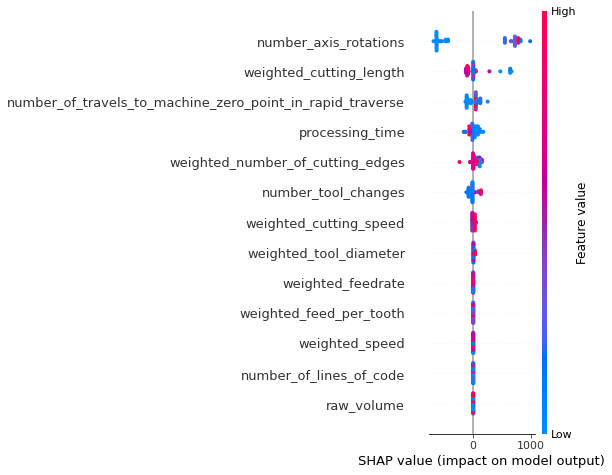

In [17]:
import shap

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# random forest




In [18]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 60, random_state = 42)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,2246.993491
1,2204.226325
2,3387.305612
3,1861.340011
4,3110.620550
5,3503.035563
6,2306.431967
7,3060.017457
8,3716.933464
9,1993.521445


          Actual    Predicted  Index
132  2150.987448  2246.993491      1
148  1953.708333  2204.226325      2
93   3259.469814  3387.305612      3
180  1780.595238  1861.340011      4
15   3069.429730  3110.620550      5
115  3596.176329  3503.035563      6
172  2216.133333  2306.431967      7
209  3069.082831  3060.017457      8
75   3610.986811  3716.933464      9
142  2103.446043  1993.521445     10
100  3195.445820  3387.305612     11
30   3763.072000  3762.233525     12
190  1885.376374  2127.688796     13
9    3218.144118  3214.674964     14
67   3527.551326  3630.240519     15
218  2684.589744  2605.414878     16
175  2541.206250  2108.953599     17
18   2164.733766  2466.703380     18
197  1875.694737  2127.688796     19
66   3552.323371  3672.834712     20
189  1679.554656  2148.690589     21
96   3081.985362  3387.305612     22
210  3328.408696  3060.017457     23
25   3713.024658  3835.292959     24
127  2038.204082  2113.758892     25
201  3320.846561  3766.344907     26
9

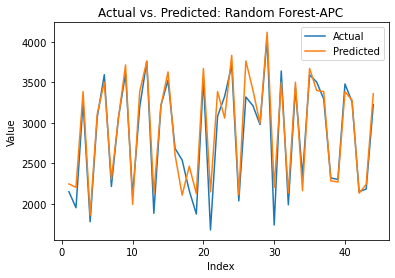

In [19]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: Random Forest-APC')
plt.legend()

#Show plot
plt.show()

In [20]:
method = 'Random Forest Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,160.095827,41648.209335,204.078929
Random Forest Regression,144.432414,36420.68487,190.842042
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-398.606497,-267079.315221,-474.934636
Random Forest Regression,-380.746304,-248378.655192,-448.999454
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


Intercept 3195.931646161219
Prediction_local [2473.97418096]
Right: 2246.9934914615933


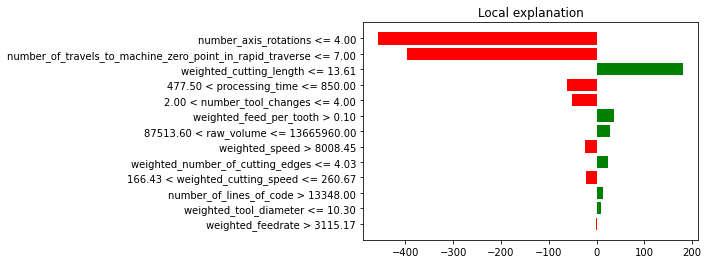

In [22]:
# Define the predict function for Lime
#predict_fn_tree = lambda x: regressor.predict(x).reshape(-1, 1)

# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['average_power_consumption'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


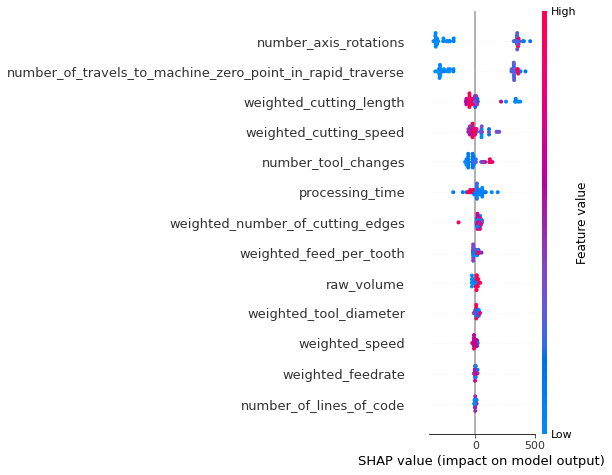

In [23]:
# Initialize the TreeExplainer
explainer = shap.TreeExplainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# Support vector Regression

In [24]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=13)
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,2243.162501
1,3251.922014
2,3252.748451
3,2243.162501
4,2243.162501
5,3251.973011
6,3251.927257
7,3252.250081
8,3253.676389
9,2243.162501


          Actual    Predicted  Index
132  2150.987448  2243.162501      1
148  1953.708333  3251.922014      2
93   3259.469814  3252.748451      3
180  1780.595238  2243.162501      4
15   3069.429730  2243.162501      5
115  3596.176329  3251.973011      6
172  2216.133333  3251.927257      7
209  3069.082831  3252.250081      8
75   3610.986811  3253.676389      9
142  2103.446043  2243.162501     10
100  3195.445820  3252.748451     11
30   3763.072000  2243.162501     12
190  1885.376374  2243.162501     13
9    3218.144118  2243.162501     14
67   3527.551326  3253.679162     15
218  2684.589744  3251.938543     16
175  2541.206250  3251.927395     17
18   2164.733766  2243.162501     18
197  1875.694737  2243.162501     19
66   3552.323371  3253.677775     20
189  1679.554656  2243.162501     21
96   3081.985362  3252.748451     22
210  3328.408696  3252.250358     23
25   3713.024658  2243.162501     24
127  2038.204082  2243.162501     25
201  3320.846561  3254.682334     26
9

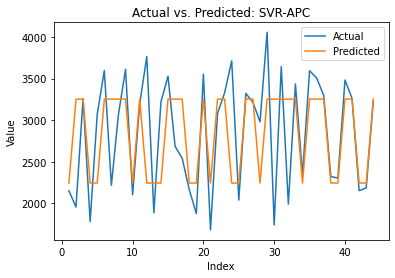

In [25]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: SVR-APC')
plt.legend()

#Show plot
plt.show()

In [26]:
method = 'Support Vector Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,160.095827,41648.209335,204.078929
Random Forest Regression,144.432414,36420.68487,190.842042
Support Vector Regression,425.466988,376568.439085,613.651725
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-398.606497,-267079.315221,-474.934636
Random Forest Regression,-380.746304,-248378.655192,-448.999454
Support Vector Regression,-558.719225,-502703.142715,-651.877229
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


Intercept 2240.3965936928093
Prediction_local [2343.96995862]
Right: 2243.162501132425


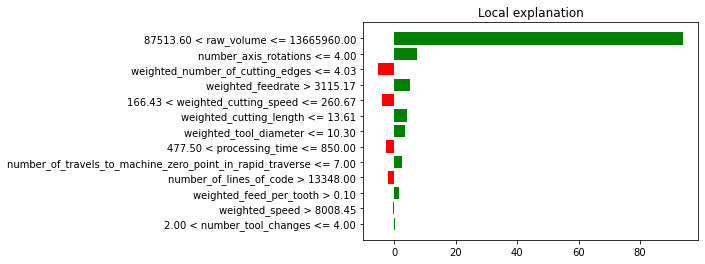

In [28]:
# Define the predict function for Lime
#predict_fn_tree = lambda x: regressor.predict(x).reshape(-1, 1)

# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['average_power_consumption'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


  0%|          | 0/44 [00:00<?, ?it/s]

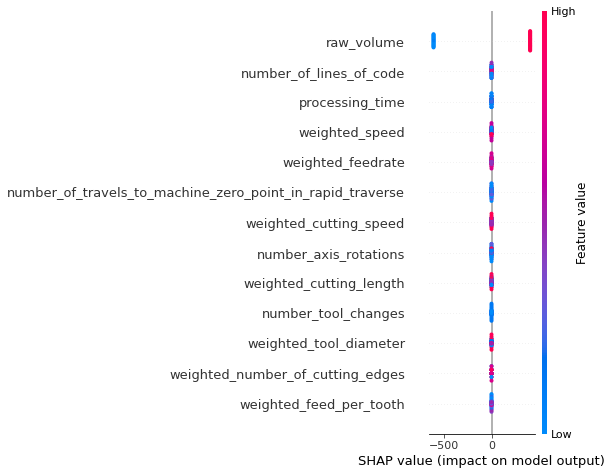

In [29]:
# Summarize the background data using shap.sample or shap.kmeans
background_summary = shap.sample(X_train, 20)  
# Initialize the explainer object with the summarized background
explainer = shap.KernelExplainer(regressor.predict, background_summary)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first feature
shap.summary_plot(shap_values, X_test)


# XGBoost

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lime
import lime.lime_tabular
import shap


In [31]:
# Train the XGBoost model
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))


,0
0,2242.615723
1,2191.887451
2,3384.046387
3,1863.039551
4,2979.489258
5,3502.335449
6,2299.604980
7,3251.893066
8,3728.373779
9,1929.642700


          Actual    Predicted  Index
132  2150.987448  2242.615723      1
148  1953.708333  2191.887451      2
93   3259.469814  3384.046387      3
180  1780.595238  1863.039551      4
15   3069.429730  2979.489258      5
115  3596.176329  3502.335449      6
172  2216.133333  2299.604980      7
209  3069.082831  3251.893066      8
75   3610.986811  3728.373779      9
142  2103.446043  1929.642700     10
100  3195.445820  3384.046387     11
30   3763.072000  3696.033447     12
190  1885.376374  2096.632812     13
9    3218.144118  3222.607178     14
67   3527.551326  3605.279541     15
218  2684.589744  2804.988525     16
175  2541.206250  2101.908936     17
18   2164.733766  2528.673584     18
197  1875.694737  2096.632812     19
66   3552.323371  3666.230469     20
189  1679.554656  2033.636475     21
96   3081.985362  3384.046387     22
210  3328.408696  3251.893066     23
25   3713.024658  3975.589111     24
127  2038.204082  2117.645264     25
201  3320.846561  3290.147461     26
9

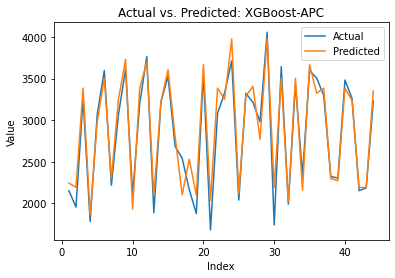

In [32]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: XGBoost-APC')
plt.legend()

#Show plot
plt.show()

In [33]:
method = 'XGBoost'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor,method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,160.095827,41648.209335,204.078929
Random Forest Regression,144.432414,36420.68487,190.842042
Support Vector Regression,425.466988,376568.439085,613.651725
XGBoost,141.546276,31913.271882,178.642861
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-398.606497,-267079.315221,-474.934636
Random Forest Regression,-380.746304,-248378.655192,-448.999454
Support Vector Regression,-558.719225,-502703.142715,-651.877229
XGBoost,-403.867973,-277778.678589,-489.06207
Neural Network,NaN,NaN,NaN


Intercept 3049.4209616711264
Prediction_local [2310.80385563]
Right: 2242.6157


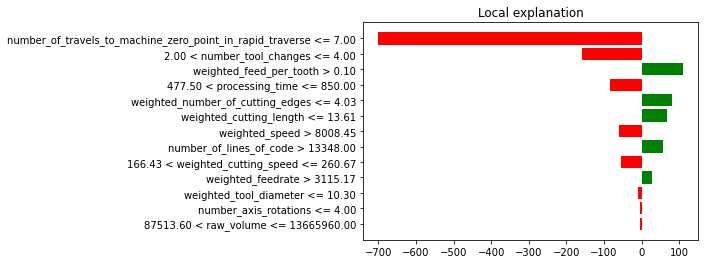

In [35]:
# Define the predict function for Lime
#predict_fn_tree = lambda x: regressor.predict(x).reshape(-1, 1)

# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['average_power_consumption'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


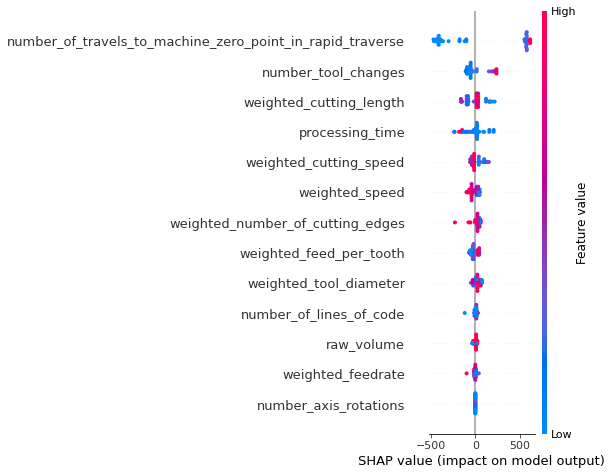

In [36]:
# Initialize the TreeExplainer
explainer = shap.Explainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# Neural Network

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Feature scaling - Standardize the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Define the model building function
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(16, input_dim=13, activation='relu'))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the KerasRegressor wrapper
regressor = KerasRegressor(build_fn=build_model, verbose=0)

# Use GridSearchCV to tune hyperparameters
param_grid = {
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model from the grid search
best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test_scaled)
display(pd.DataFrame(y_pred))

Best Hyperparameters:  {'batch_size': 10, 'epochs': 100}
Best Score:  -926042.625


,0
0,1913.730103
1,2085.879883
2,2175.317139
3,1947.643188
4,3069.936523
5,3839.418945
6,1973.332153
7,3063.021484
8,4234.307129
9,1898.469360


          Actual    Predicted  Index
132  2150.987448  1913.730103      1
148  1953.708333  2085.879883      2
93   3259.469814  2175.317139      3
180  1780.595238  1947.643188      4
15   3069.429730  3069.936523      5
115  3596.176329  3839.418945      6
172  2216.133333  1973.332153      7
209  3069.082831  3063.021484      8
75   3610.986811  4234.307129      9
142  2103.446043  1898.469360     10
100  3195.445820  2175.317139     11
30   3763.072000  2934.296875     12
190  1885.376374  1921.376221     13
9    3218.144118  3082.199219     14
67   3527.551326  4257.573242     15
218  2684.589744  2073.927734     16
175  2541.206250  1969.486450     17
18   2164.733766  2906.435059     18
197  1875.694737  1918.628540     19
66   3552.323371  4245.939941     20
189  1679.554656  1890.476685     21
96   3081.985362  2175.317139     22
210  3328.408696  3055.871094     23
25   3713.024658  2938.842529     24
127  2038.204082  1478.566772     25
201  3320.846561  3170.923828     26
9

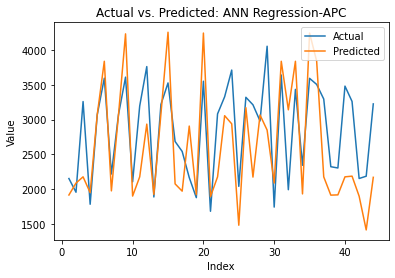

In [38]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: ANN Regression-APC')
plt.legend()

#Show plot
plt.show()

In [39]:
method = 'Neural Network'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, best_regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,160.095827,41648.209335,204.078929
Random Forest Regression,144.432414,36420.68487,190.842042
Support Vector Regression,425.466988,376568.439085,613.651725
XGBoost,141.546276,31913.271882,178.642861
Neural Network,532.838286,428095.222726,654.289861


,MAE,MSE,RMSE
Decision Tree Regression,-398.606497,-267079.315221,-474.934636
Random Forest Regression,-380.746304,-248378.655192,-448.999454
Support Vector Regression,-558.719225,-502703.142715,-651.877229
XGBoost,-403.867973,-277778.678589,-489.06207
Neural Network,-1772.633695,-6005354.161566,-1525.085906


Intercept 1543.64022306589
Prediction_local [1127.03205957]
Right: 1913.7301


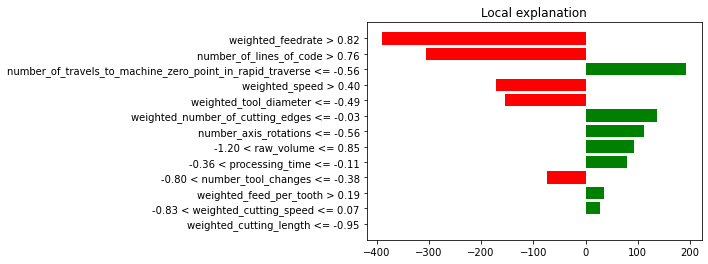

In [41]:
# Define the predict function for Lime
def predict_fn(x):
    return best_regressor.predict(x)

# Define the explainer object for Lime
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns.values,
                                                   class_names=['average_power_consumption'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test_scaled[0]

# Generate the explanation for the instance using Lime
exp = explainer.explain_instance(instance, predict_fn, num_features=len(X.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


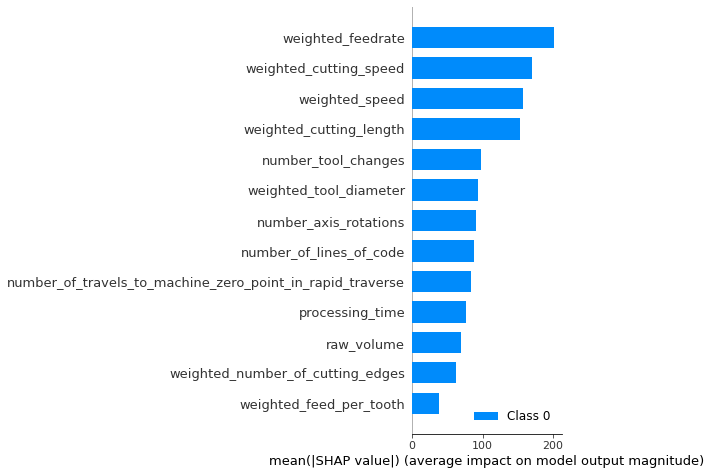

In [42]:
import shap
import numpy as np

# Convert KerasRegressor to Keras Sequential model
model = grid_search.best_estimator_.model

# Create an explainer object
explainer = shap.DeepExplainer(model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_scaled)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns)
